# SymPy包介绍

[SymPy官方文档(英文)](https://docs.sympy.org/latest/index.html)

SymPy 是一个用于符号数学计算的 Python 库。与数值计算库（如 NumPy 和 SciPy）不同，SymPy 的主要目标是提供一个完全符号化的系统，用于执行代数、微积分、方程求解等。

为什么使用SymPy
* 能够精确地处理代数表达式，不会出现数值误差。
* 可以与其他 Python 库（如 Matplotlib、NumPy）无缝集成。
* 提供了一个直观的 API，用于创建和操作数学表达式。

## 符号，表达式以及方程的定义

In [47]:
from sympy import *

#符号的定义
x, y = symbols('x y')
x

x

In [48]:
from sympy import *

#符号的定义
beta = symbols('beta_1:4')
beta[0]

beta_1

In [49]:
from sympy import *

#符号的定义
x, y = symbols('x y')
beta = symbols('beta_1:4')

#表达式的定义
expr = x**2 + 2*y + beta[0] + beta[1]*x + beta[2]*y

expr

beta_1 + beta_2*x + beta_3*y + x**2 + 2*y

In [50]:
from sympy import *

#符号的定义
x, y = symbols('x y')
beta = symbols('beta_1:4')

#表达式的定义
expr = x**2 + 2*y + beta[0] + beta[1]*x + beta[2]*y

#等式的定义，注意，是用Eq函数定义的，并不是=或者==
eq = Eq(expr, 0)

eq

Eq(beta_1 + beta_2*x + beta_3*y + x**2 + 2*y, 0)

## 替换与化简

sympy中可以使用`subs`函数用于替换

In [51]:
from sympy import *

x, y, z = symbols('x y z')
expr = cos(x**2) + 1
expr.subs(x, y)

cos(y**2) + 1

In [52]:
from sympy import *

x, y, z = symbols('x y z')
expr = cos(x**2) + 1
expr.subs(x, z**2)

cos(z**4) + 1

In [53]:
from sympy import *

x, y, z = symbols('x y z')
expr = cos(x**2) + 1
expr.subs(x**2, y)

cos(y) + 1

In [54]:
from sympy import *

x, y, z = symbols('x y z')
expr = cos(x**2) + sin(x**2) + tan(x**3) + x*x
expr.subs(x**2, y)

y + sin(y) + cos(y) + tan(x**3)

In [55]:
from sympy import *

x, y, z = symbols('x y z')
expr = cos(x**2) + sin(x**2) + tan(x**3) + x*x
expr.subs(x, sqrt(y))

y + sin(y) + cos(y) + tan(y**(3/2))

SymPy中提供了多种化简以及变换的函数，以及一个智能的化简函数`simplify`

In [56]:
from sympy import *

x = symbols('x')
simplify(sin(x)**2 + cos(x)**2)

1

In [57]:
from sympy import *

x = symbols('x')
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

x - 1

`simplify`有一个缺陷，由于表达式“最简化”并没有一个良好的定义，SymPy只能使用库中已有的化简操作，使用启发式方法来决定其认为的“最简化”结果。各种化简函数繁多，这里不再单独介绍，请有需要的同学移步官方文档[Simplification](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html) 

## 求值

如果我们想要将一个数值表达式转化为一个浮点数，可以使用`evalf`函数

In [58]:
from sympy import *

expr = sqrt(8)
expr

2*sqrt(2)

In [59]:
from sympy import *

expr = sqrt(8)
expr.evalf()

2.82842712474619

In [60]:
from sympy import *

expr = sqrt(8)
expr.evalf(3)

2.83

In [61]:
from sympy import *
x = symbols('x')

expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

In [62]:
from sympy import *

one = cos(1)**2 + sin(1)**2

print((one - 1).evalf())
print((one - 1).evalf(chop=True))

-0.e-124
0


如果我们想要再多个点对表达式进行求值，我们可以使用`lambdify`对其进行求值

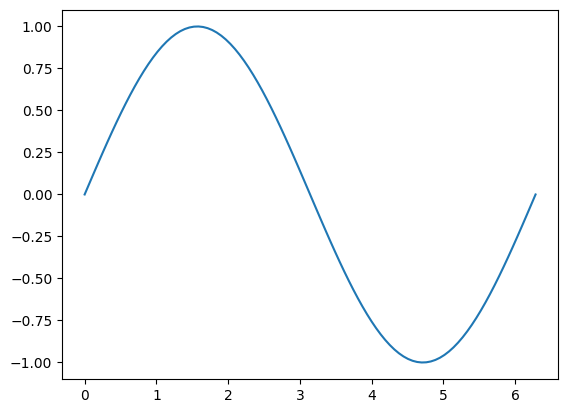

In [63]:
from sympy import *
import numpy as np
from matplotlib import pyplot as plt

x = symbols('x')
x_n = np.linspace(0,2*np.pi,100)
expr = sin(x)
f = lambdify(x, expr, "numpy")

fig, ax = plt.subplots()
ax.plot(x_n, f(x_n))

plt.show()

## 求解代数方程
在SymPy中，我们可以使用`solveset`函数求解代数方程。其。还有一个函数`solve`也可以用于求解方程，但是并不推荐。

In [64]:
from sympy import *
x = symbols('x')

##注意：以下3种方式都是可以的
print(solveset(Eq(x**2, 1), x))
print(solveset(Eq(x**2 - 1, 0), x))
print(solveset(x**2 - 1, x))

{-1, 1}
{-1, 1}
{-1, 1}


In [65]:
from sympy import *
x = symbols('x')

solveset(x - x, x, domain=S.Reals)

Reals

In [66]:
from sympy import *
x = symbols('x')

solveset(sin(x) - 1, x, domain=S.Reals)

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

In [67]:
from sympy import *
x = symbols('x')

solveset(exp(x), x)

EmptySet

In [68]:
from sympy import *
x = symbols('x')

solveset(cos(x) - x, x)

ConditionSet(x, Eq(-x + cos(x), 0), Complexes)

In [69]:
from sympy import *
x, y, z = symbols('x y z')

solveset(x + y * z - 1,x)

{-y*z + 1}

对于多元线性方程，我们需要使用`linsolve`求解

In [70]:
from sympy import *
x, y, z = symbols('x y z')

linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

{(-y - 1, y, 2)}

In [71]:
from sympy import *
x, y, z = symbols('x y z')

linsolve([x + y + z - 1, x + y + 2*z - 3, x + 2*y + z - 2], (x, y, z))

{(-2, 1, 2)}

对于非线性多元方程的求解，我们需要用到`nonlinsolve`

In [72]:
from sympy import *
x, y = symbols('x y')

nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

{(-I, -I), (-I, I), (I, -I), (I, I)}

## 微分学
我们可以使用`diff`函数，求一元函数的导数、多元函数的偏导数。

In [73]:
from sympy import *
x, y, z = symbols('x y z')

diff(cos(x), x)

-sin(x)

In [74]:
from sympy import *
x, y, z = symbols('x y z')

diff(exp(x**2), x)

2*x*exp(x**2)

In [75]:
from sympy import *
x, y, z = symbols('x y z')

diff(x**4, x, x, x)

24*x

In [76]:
from sympy import *
x, y, z = symbols('x y z')

diff(x**4, x, 3)

24*x

In [77]:
from sympy import *
x, y, z = symbols('x y z')

expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [78]:
# diff也可以被作为方法调用
from sympy import *
x, y, z = symbols('x y z')

expr = exp(x*y*z)
expr.diff(x, y, y, z, z, z, z)

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [79]:
from sympy import *
m, n, a, b = symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))

Derivative((a*x + b)**m, (x, n))

## 积分学

我们使用`integrate`来计算不定积分与定积分。

**注意：** 计算不定积分时，不带常数！在用SymPy做高数作业的时候别把常数漏了

In [80]:
from sympy import *
x = symbols('x')

integrate(cos(x), x)

sin(x)

计算定积分时，增加参数`(integration_variable, lower_limit, upper_limit)`即可，例如，我们想要计算
$$\int_0^\infty e^{-x}dx$$

In [81]:
from sympy import *
x = symbols('x')

integrate(exp(-x), (x, 0, oo))

1

如果我们想要计算：

$$\int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2-y^2}dxdy$$

In [82]:
from sympy import *
x, y = symbols('x y')

integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

pi

In [83]:
# 如果SymPy遇到无法计算的积分，其会返回一个未计算的积分对象
from sympy import *
x = symbols('x')

integrate(x**x, x)

Integral(x**x, x)

## 极限

在SymPy中，我们可以使用`limit`函数计算符号极限。如果我们想要求解$\lim_{x\to x_0}f(x)$，我们可以使用`limit(f(x), x, x0)`

In [84]:
from sympy import *
x = symbols('x')

limit(sin(x)/x, x, 0)

1

In [85]:
from sympy import *
x = symbols('x')

expr = x**2/exp(x)
print(expr.subs(x, oo))
print(limit(expr, x, oo))

nan
0


在后面增加参数`+`或`-`，可以指定求的是左极限还是右极限

In [86]:
from sympy import *
x = symbols('x')

limit(1/x, x, 0, '+')  #左右极限不同

oo

In [87]:
from sympy import *
x = symbols('x')

limit(1/x, x, 0, '-')  #左右极限不同

-oo

## 求解微分方程

在SymPy中，我们可以使用`dsolve`求解微分方程。我们以之前见到过的微分方程为例
$$m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0$$

In [88]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
m, c, k = symbols('m c k')

diffeq = Eq(m*f(x).diff(x, x) + c*f(x).diff(x) + k*f(x), 0)
diffeq

Eq(c*Derivative(f(x), x) + k*f(x) + m*Derivative(f(x), (x, 2)), 0)

In [89]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
m, c, k = symbols('m c k')

diffeq = Eq(m*f(x).diff(x, x) + c*f(x).diff(x) + k*f(x), 0)
sol = dsolve(diffeq, f(x), ics={f(0): 5, f(x).diff(x).subs(x, 0): 0})

sol

Eq(f(x), (-5*c/(2*sqrt(c**2 - 4*k*m)) + 5/2)*exp(-x*(c + sqrt(c**2 - 4*k*m))/(2*m)) + (5*c/(2*sqrt(c**2 - 4*k*m)) + 5/2)*exp(x*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

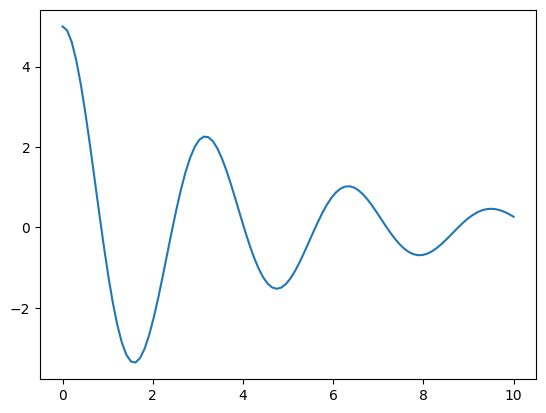

In [90]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

f = symbols('f', cls=Function)
x = symbols('x')
m, c, k = symbols('m c k')

diffeq = Eq(m*f(x).diff(x, x) + c*f(x).diff(x) + k*f(x), 0)
sol = dsolve(diffeq, f(x), ics={f(0): 5, f(x).diff(x).subs(x, 0): 0})

a = sol.args[1]    #得到等式右边
a = a.subs([(m,1),(c,0.5),(k,4)])

t_eval = np.linspace(0,10,100)             #返回解用的时间点
f = lambdify(x, a, "numpy")
t_n = np.linspace(0,10,100)
x_n = f(t_eval).real

#绘制图像
fig, ax = plt.subplots()
ax.plot(t_n, x_n)
plt.show()